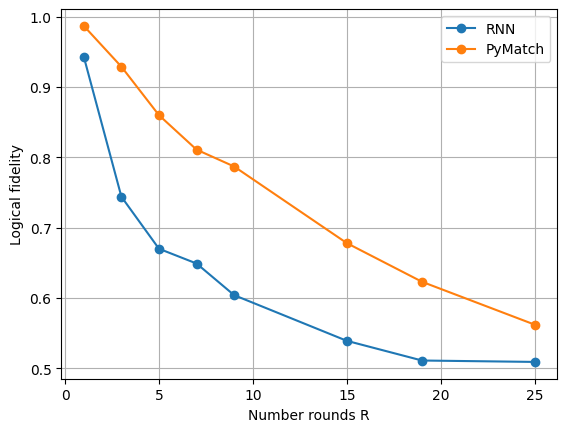

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


R_data = np.array([1, 3, 5, 7, 9,15,19,25])  # Example data for the x-axis (vector)
F_data_RNN = np.array([0.943,0.744,0.67,0.649,0.604,0.539,0.511,0.509])  # Example data for the y-axis (vector)
F_data_pym= np.array([0.987,0.929,0.86,0.811,0.787,0.678,0.623,0.562])  # Example data for the y-axis (vector)

F_data_RNN_G = F_data_RNN*2-1
F_data_pym_G=F_data_pym*2-1

plt.plot(R_data, F_data_RNN, label="RNN", marker='o')  # Plot the line with markers
plt.plot(R_data, F_data_pym, label="PyMatch", marker='o')  # Plot the line with markers


plt.xlabel("Number rounds R")  # Label for the x-axis
plt.ylabel("Logical fidelity")  # Label for the y-axis


plt.legend()  # Add a legend for the plotted data
plt.grid(True)  # Show gridlines

plt.show()

Fitted epsilon_L RNN: [0.08802958]

Fitted epsilon_L pymatch: [0.0332368]


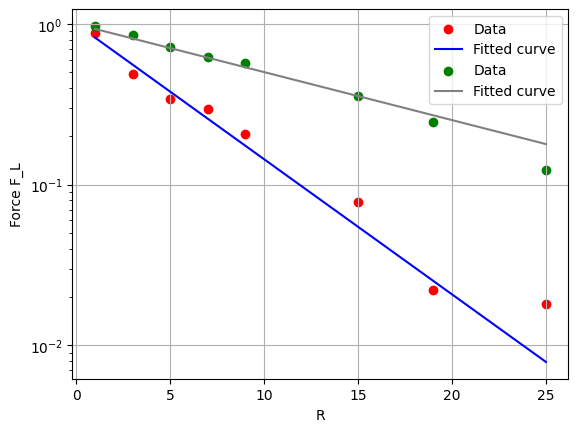

In [5]:
def model(R, R0, epsilon_L):
    return 0.5 * (1 + (1 - 2 * epsilon_L) ** (R - R0))

def model_G(R, epsilon_L):
    return  (1 - 2 * epsilon_L) ** (R )

# Perform curve fitting
initial_guess = 1.0  # Initial guess for R0 and epsilon_L
params_RNN, covariance_RNN = curve_fit(model_G, R_data, F_data_RNN_G, p0=initial_guess)
params_pym, covariance_pym = curve_fit(model_G, R_data, F_data_pym_G, p0=initial_guess)

# Extract fitted parameters
epsilon_L_fitted_RNN = params_RNN
#print(f"Fitted R0 RNN: {R0_fitted_RNN}")
print(f"Fitted epsilon_L RNN: {epsilon_L_fitted_RNN}")
print("")
epsilon_L_fitted_pym = params_pym
#print(f"Fitted R0 pymatch: {R0_fitted_pym}")
print(f"Fitted epsilon_L pymatch: {epsilon_L_fitted_pym}")


# Generate fitted curve
R_fitted_RNN = np.linspace(min(R_data), max(R_data), 100)
F_fitted_RNN = model_G(R_fitted_RNN,  epsilon_L_fitted_RNN)

R_fitted_pym = np.linspace(min(R_data), max(R_data), 100)
F_fitted_pym = model_G(R_fitted_pym,  epsilon_L_fitted_pym)

# Plot the data and the fitted curve
plt.scatter(R_data, F_data_RNN_G, label='Data', color='red')
plt.plot(R_fitted_RNN, F_fitted_RNN, label='Fitted curve', color='blue')

plt.scatter(R_data, F_data_pym_G, label='Data', color='green')
plt.plot(R_fitted_pym, F_fitted_pym, label='Fitted curve', color='grey')

plt.xlabel('R')
plt.yscale('log')
plt.ylabel('Force F_L')
plt.legend()
plt.grid(True)
plt.show()


Fitted R0 RNN: 0.23389699429123403
Fitted epsilon_L RNN: 0.09993465674807446

Fitted R0 pymatch: 0.82481757641242
Fitted epsilon_L pymatch: 0.036354082147733204


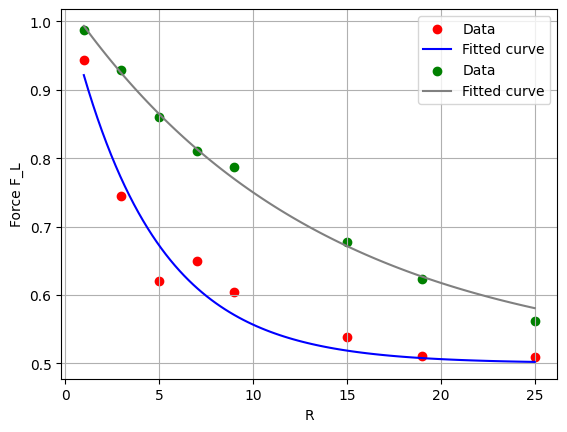

In [3]:
def model(R, R0, epsilon_L):
    return 0.5 * (1 + (1 - 2 * epsilon_L) ** (R - R0))

# Perform curve fitting
initial_guess = [1.0,0.1]  # Initial guess for R0 and epsilon_L
params_RNN, covariance_RNN = curve_fit(model, R_data, F_data_RNN, p0=initial_guess)
params_pym, covariance_pym = curve_fit(model, R_data, F_data_pym, p0=initial_guess)

# Extract fitted parameters
R0_fitted_RNN, epsilon_L_fitted_RNN = params_RNN
print(f"Fitted R0 RNN: {R0_fitted_RNN}")
print(f"Fitted epsilon_L RNN: {epsilon_L_fitted_RNN}")
print("")
R0_fitted_pym, epsilon_L_fitted_pym = params_pym
print(f"Fitted R0 pymatch: {R0_fitted_pym}")
print(f"Fitted epsilon_L pymatch: {epsilon_L_fitted_pym}")


# Generate fitted curve
R_fitted_RNN = np.linspace(min(R_data), max(R_data), 100)
F_fitted_RNN = model(R_fitted_RNN, R0_fitted_RNN, epsilon_L_fitted_RNN)

R_fitted_pym = np.linspace(min(R_data), max(R_data), 100)
F_fitted_pym = model(R_fitted_pym,  R0_fitted_pym, epsilon_L_fitted_pym)

# Plot the data and the fitted curve
plt.scatter(R_data, F_data_RNN, label='Data', color='red')
plt.plot(R_fitted_RNN, F_fitted_RNN, label='Fitted curve', color='blue')

plt.scatter(R_data, F_data_pym, label='Data', color='green')
plt.plot(R_fitted_pym, F_fitted_pym, label='Fitted curve', color='grey')

plt.xlabel('R')
plt.ylabel('Force F_L')
plt.legend()
plt.grid(True)
plt.show()